In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import cmath #for complex numbers

from scipy.spatial import distance_matrix

We set $\Gamma$ = 1 so we simply have the time in units of $\Gamma$. Also we set $k_e r_{ij} = k$ where $k$ is some contant  

In [17]:
dipole_vector_hat = np.array([0, 1, 0]) #i y retning 

Only important thing is the directions between the points 

In [18]:
points = np.array([
    # [-8, 0, 0],
    # [-7, 0, 0],
    # [-6, 0, 0],
    # [-5, 0, 0],
    # [-4, 0, 0],
    # [-3, 0, 0],
    [-2, 0, 0],
    [-1, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
    [2, 0, 0],
    #  [3, 0, 0],
    # [4, 0, 0],
    # [5, 0, 0],
    # [6, 0, 0],
    # [7, 0, 0],
    # [8, 0, 0]
])

#distance_matrix = distance_matrix(points, points) eventuelt for hurtigere 
r_ij_vector = points[:, np.newaxis] - points
r_ij = np.linalg.norm(r_ij_vector, axis=2, keepdims=True)
r_ij_hat = np.divide(r_ij_vector, r_ij, out=np.zeros_like(r_ij_vector, dtype=float), where=(r_ij != 0)) 

In [19]:
k_e__r_ij_vector = 0.2 * np.pi * r_ij_vector 
k_e__r_ij = np.linalg.norm(k_e__r_ij_vector, axis=2, keepdims=True)
k_e__r_ij[0]

array([[0.        ],
       [0.62831853],
       [1.25663706],
       [1.88495559],
       [2.51327412]])

In [20]:
F = np.zeros(shape = (len(k_e__r_ij), len(k_e__r_ij)), dtype=complex)

for l in range(len(k_e__r_ij)): 
   dot_product = np.dot(r_ij_hat[l, :, :] , dipole_vector_hat)

   denom1 = (k_e__r_ij[l].flatten())
   denom2 = (k_e__r_ij[l].flatten())**2
   denom3 = (k_e__r_ij[l].flatten())**3
   safe_denom1 = np.where(denom1 == 0, np.nan, denom1)
   safe_denom2 = np.where(denom2 == 0, np.nan, denom2)
   safe_denom3 = np.where(denom3 == 0, np.nan, denom3)

   f_ji =  3/2 * (1 - (dot_product)**2) * np.sin(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.cos(k_e__r_ij[l].flatten())/safe_denom2 - np.sin(k_e__r_ij[l].flatten())/ safe_denom3) 
   g_ji = -3/2 * (1 - (dot_product)**2) * np.cos(k_e__r_ij[l].flatten())/safe_denom1 \
      + 3/2 * (1 - 3 * (dot_product)**2) * (np.sin(k_e__r_ij[l].flatten())/safe_denom2 + np.cos(k_e__r_ij[l].flatten())/ safe_denom3) 
   
   f_ji = np.nan_to_num(f_ji)
   g_ji = np.nan_to_num(g_ji)

   #Fill F
   F[:, l] = f_ji + 1j * g_ji 

Let $A = -\frac{1}{2} (I + F)$ and solve for eigenvalues and eigenvectors of A. Then $b(t) = ve^{\lambda t}$

In [21]:
I = np.eye(len(k_e__r_ij), dtype = complex)

A = - 1/2 * (I + F)

#Note eigenvectors are in the columns 
A_eigenvalues, A_eigenvectors = np.linalg.eig(A)


for eigenvalue in A_eigenvalues:
    print(eigenvalue)

(-1.8702543922374808-5.184235922957562j)
(-0.5554946981767929-1.9755990204770086j)
(-0.03363073936481986+0.3538906985054095j)
(-0.002626777706725764+4.173292629160999j)
(-0.03799339251418023+2.6326516157681654j)


The $|b(t)|^2$

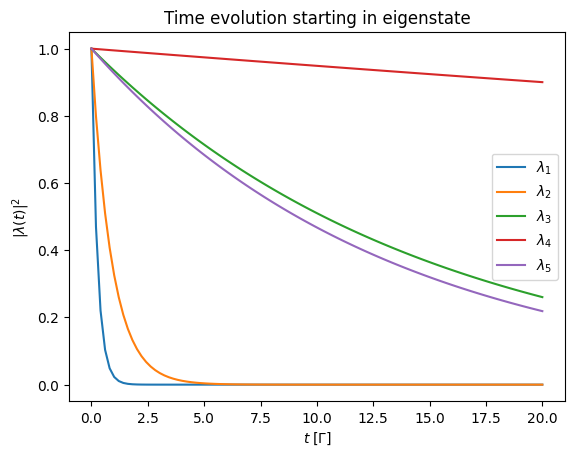

In [22]:
t = np.linspace(0,20, 100)
bt = np.zeros(shape = (len(k_e__r_ij), len(t)), dtype=complex)

for i in range(len(A_eigenvalues)):
    bt[i] = np.exp((A_eigenvalues[i] + np.conjugate(A_eigenvalues[i])) * t) 

    plt.plot(t, bt[i].real, label=r'$\lambda_{' + f'{i+1}' + '}$')


plt.legend()
plt.title('Time evolution starting in eigenstate')
plt.xlabel(r"$t \; [\Gamma]$")
plt.ylabel(r"$|\lambda(t)|^2$");

Level shift

In [23]:
A_eigenvalues

array([-1.87025439-5.18423592j, -0.5554947 -1.97559902j,
       -0.03363074+0.3538907j , -0.00262678+4.17329263j,
       -0.03799339+2.63265162j])

In [24]:
A_eigenvectors

array([[ 3.35519539e-01-1.93020791e-02j,  5.07686246e-01+0.00000000e+00j,
        -5.56492550e-01-1.53529623e-02j,  2.77808661e-01+2.41472696e-03j,
        -4.91238372e-01-3.06518830e-02j],
       [ 4.91820968e-01-6.05107642e-03j,  4.91238372e-01+3.06518830e-02j,
         4.45387902e-02-1.08184423e-02j, -5.05987929e-01+3.03021862e-03j,
         5.07686246e-01+0.00000000e+00j],
       [ 5.38757066e-01+0.00000000e+00j, -1.40216003e-16+8.50377567e-17j,
         6.13155096e-01+0.00000000e+00j,  5.77552682e-01+0.00000000e+00j,
        -7.49854382e-17-1.17968045e-16j],
       [ 4.91820968e-01-6.05107642e-03j, -4.91238372e-01-3.06518830e-02j,
         4.45387902e-02-1.08184423e-02j, -5.05987929e-01+3.03021862e-03j,
        -5.07686246e-01+3.88578059e-16j],
       [ 3.35519539e-01-1.93020791e-02j, -5.07686246e-01-1.94289029e-16j,
        -5.56492550e-01-1.53529623e-02j,  2.77808661e-01+2.41472696e-03j,
         4.91238372e-01+3.06518830e-02j]])

In [25]:
A_eigenvectors[:, 0]

array([0.33551954-0.01930208j, 0.49182097-0.00605108j,
       0.53875707+0.j        , 0.49182097-0.00605108j,
       0.33551954-0.01930208j])

In [26]:
A_eigenvectors[:, 1]

array([ 5.07686246e-01+0.00000000e+00j,  4.91238372e-01+3.06518830e-02j,
       -1.40216003e-16+8.50377567e-17j, -4.91238372e-01-3.06518830e-02j,
       -5.07686246e-01-1.94289029e-16j])

In [27]:
A_eigenvectors[:, 2]

array([-0.55649255-0.01535296j,  0.04453879-0.01081844j,
        0.6131551 +0.j        ,  0.04453879-0.01081844j,
       -0.55649255-0.01535296j])

In [28]:
A_eigenvectors[:, 3]

array([ 0.27780866+0.00241473j, -0.50598793+0.00303022j,
        0.57755268+0.j        , -0.50598793+0.00303022j,
        0.27780866+0.00241473j])

In [29]:
A_eigenvectors[:, 4]

array([-4.91238372e-01-3.06518830e-02j,  5.07686246e-01+0.00000000e+00j,
       -7.49854382e-17-1.17968045e-16j, -5.07686246e-01+3.88578059e-16j,
        4.91238372e-01+3.06518830e-02j])